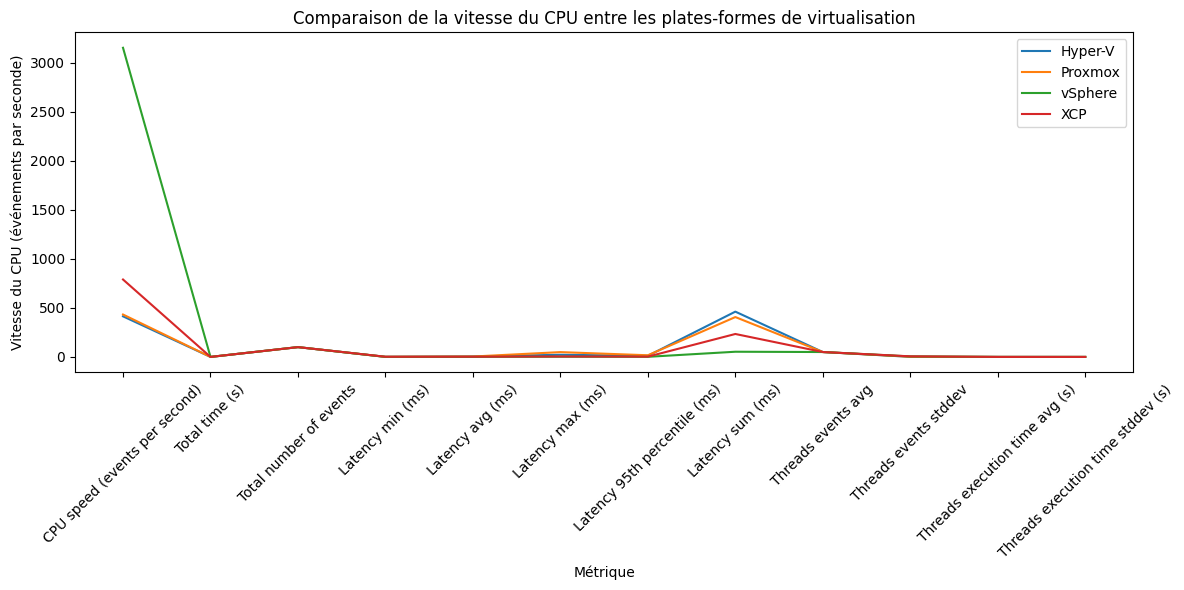

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hyperv_df = pd.read_csv('/content/CPU/hyperV_cpu.csv')
proxmox_df = pd.read_csv('/content/CPU/proxmox_cpu.csv')
vsphere_df = pd.read_csv('/content/CPU/vsphere_cpu.csv')
xcp_df = pd.read_csv('/content/CPU/xcp_cpu.csv')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(hyperv_df['Metric'], hyperv_df['Value'], label='Hyper-V')
ax.plot(proxmox_df['Metric'], proxmox_df['Value'], label='Proxmox')
ax.plot(vsphere_df['Metric'], vsphere_df['Value'], label='vSphere')
ax.plot(xcp_df['Metric'], xcp_df['Value'], label='XCP')

ax.set_xlabel('Métrique')
ax.set_ylabel('Vitesse du CPU (événements par seconde)')
ax.set_title('Comparaison de la vitesse du CPU entre les plates-formes de virtualisation')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


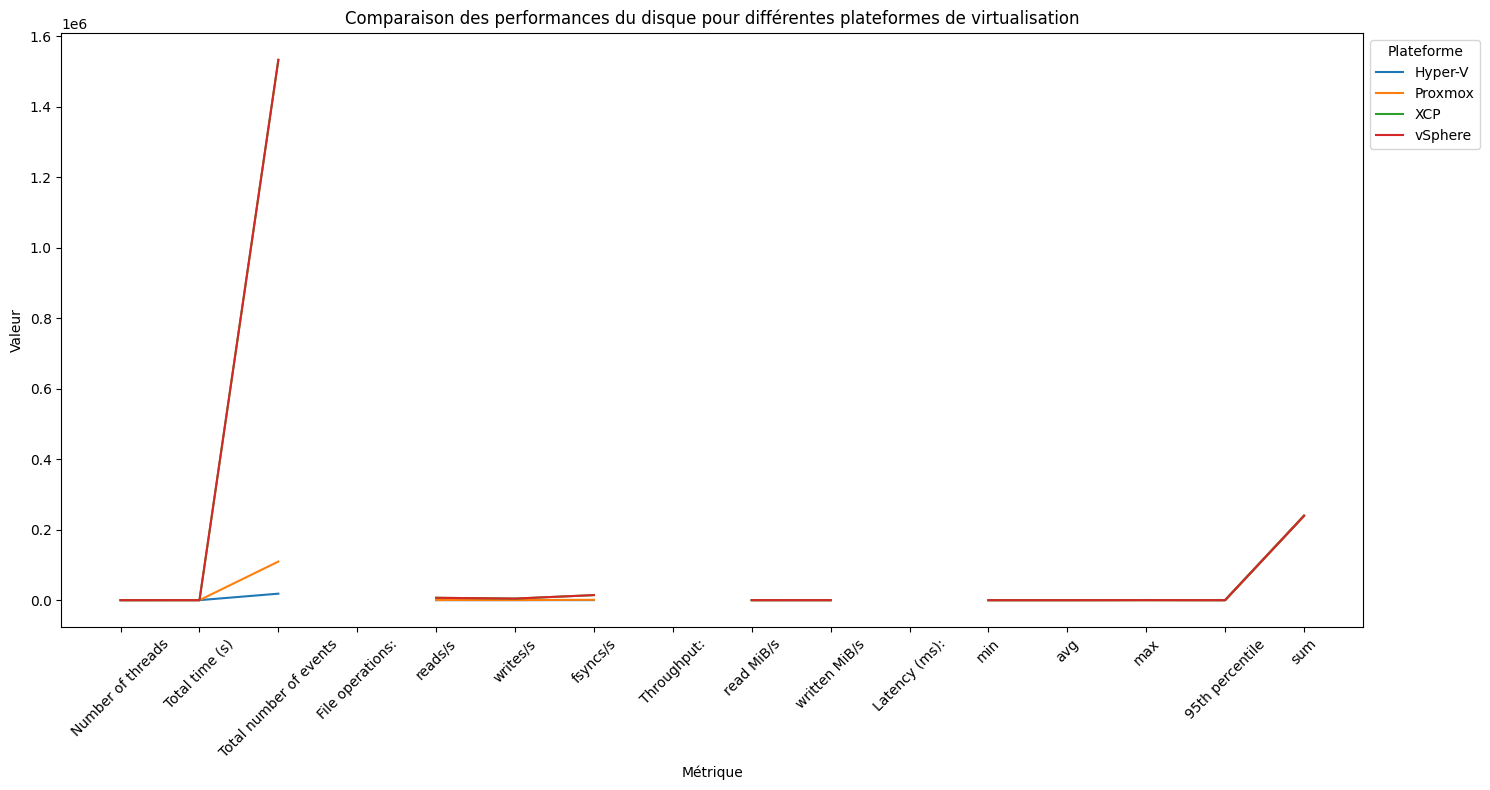

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hyperv_df = pd.read_csv('/content/DISK/hyperV_disk.csv')
proxmox_df = pd.read_csv('/content/DISK/proxmox_disk.csv')
vsphere_df = pd.read_csv('/content/DISK/vsphere_disk.csv')
xcp_df = pd.read_csv('/content/DISK/xcp_disk.csv')

hyperv_df['Platform'] = 'Hyper-V'
proxmox_df['Platform'] = 'Proxmox'
vsphere_df['Platform'] = 'vSphere'
xcp_df['Platform'] = 'XCP'

concat_df = pd.concat([hyperv_df, proxmox_df, vsphere_df, xcp_df], axis=0)

concat_df['Value'] = pd.to_numeric(concat_df['Value'], errors='coerce')

plt.figure(figsize=(15, 8))

for platform, df in concat_df.groupby('Platform'):
    plt.plot(df['Metric'], df['Value'], label=platform)

plt.title('Comparaison des performances du disque pour différentes plateformes de virtualisation', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plateforme', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.ylabel('Valeur')
plt.xlabel('Métrique')

plt.tight_layout()
plt.show()


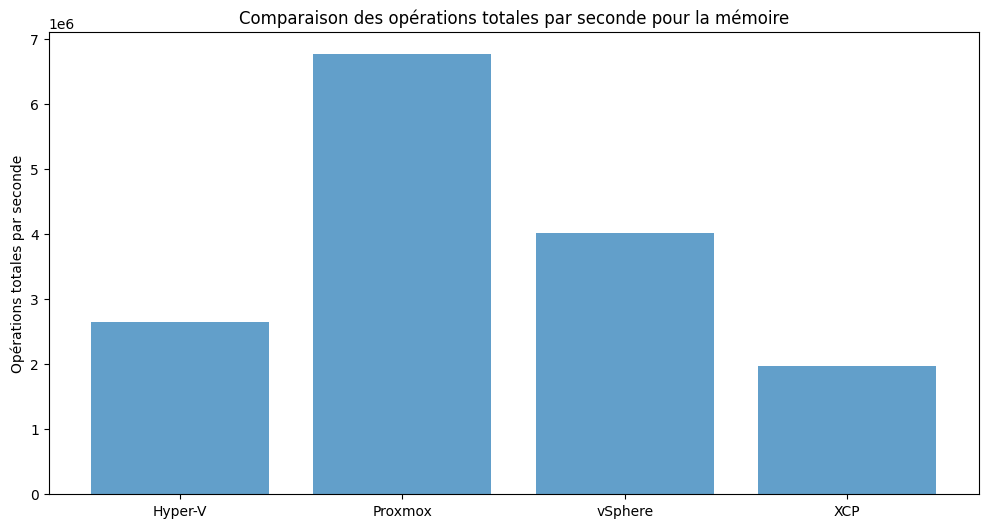

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hyperv_df = pd.read_csv('/content/Memory/HyperV_memory.csv')
proxmox_df = pd.read_csv('/content/Memory/proxmox_memory.csv')
vsphere_df = pd.read_csv('/content/Memory/vsphere_memory.csv')
xcp_df = pd.read_csv('/content/Memory/xcp_memory.csv')

hyperv_ops = hyperv_df.loc[hyperv_df['Metric'] == 'Total operations per second', 'Value'].values[0]
proxmox_ops = proxmox_df.loc[proxmox_df['Metric'] == 'Total operations per second', 'Value'].values[0]
vsphere_ops = vsphere_df.loc[vsphere_df['Metric'] == 'Total operations per second', 'Value'].values[0]
xcp_ops = xcp_df.loc[xcp_df['Metric'] == 'Total operations per second', 'Value'].values[0]

plt.figure(figsize=(12, 6))
plt.bar(['Hyper-V', 'Proxmox', 'vSphere', 'XCP'], [hyperv_ops, proxmox_ops, vsphere_ops, xcp_ops], alpha=0.7)
plt.ylabel('Opérations totales par seconde')
plt.title('Comparaison des opérations totales par seconde pour la mémoire')
plt.show()


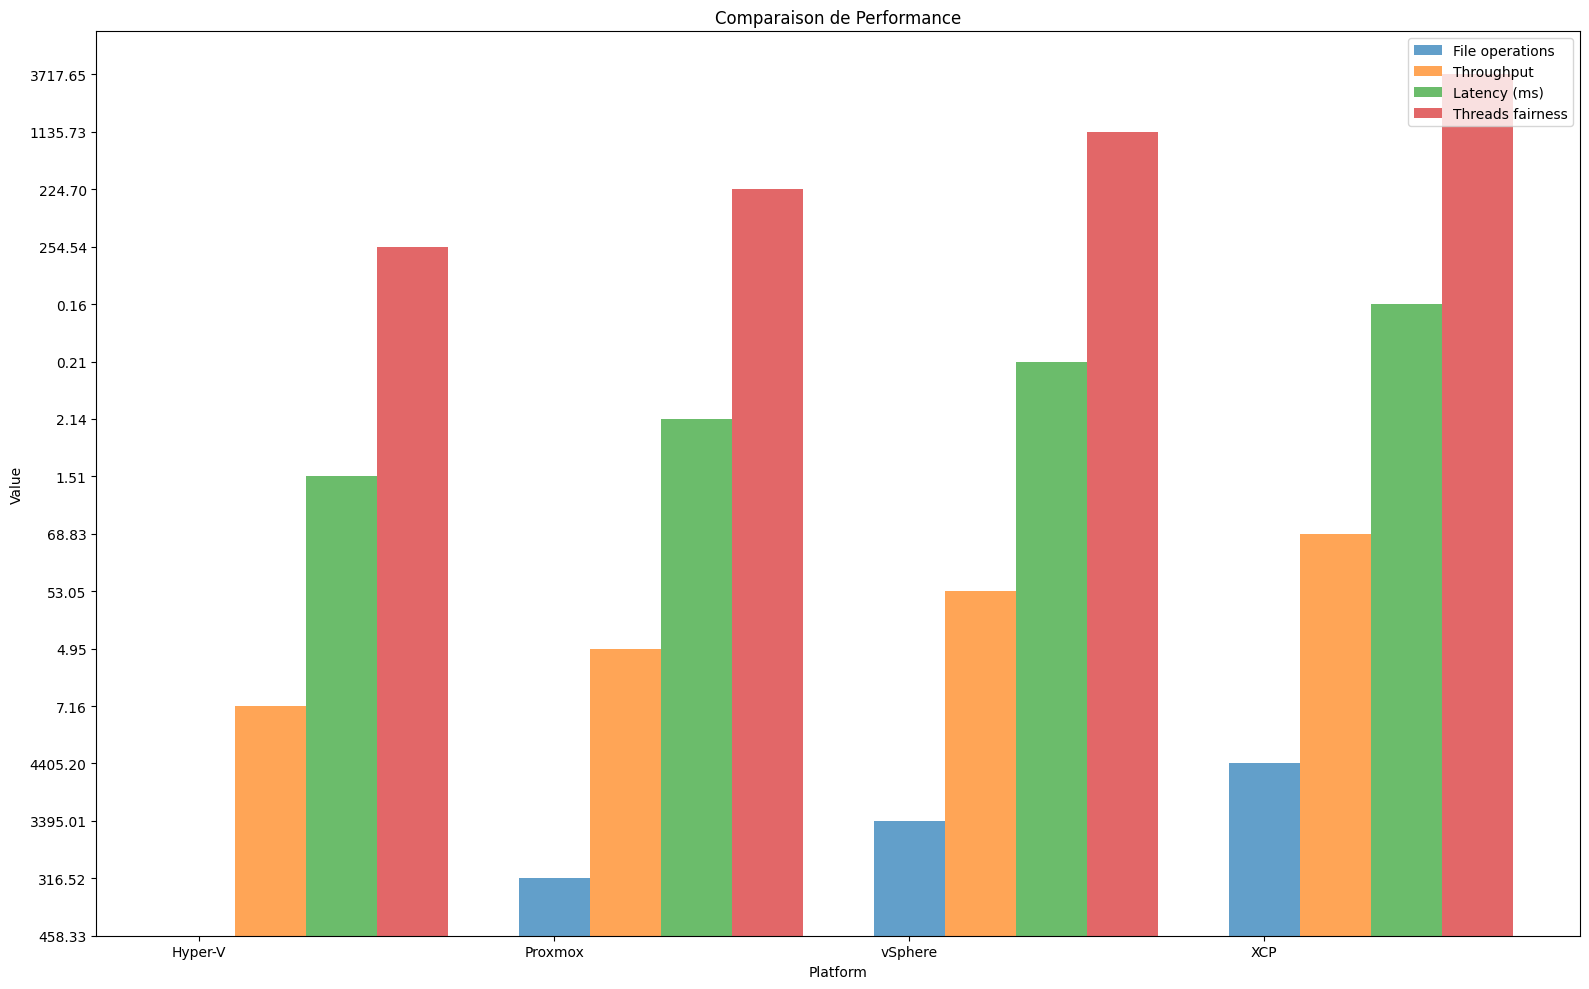

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hyperv_df = pd.read_csv('/content/perf/HyperV_performance.csv', header=None, index_col=0, skipinitialspace=True)
proxmox_df = pd.read_csv('/content/perf/proxmox_performance.csv', header=None, index_col=0, skipinitialspace=True)
vsphere_df = pd.read_csv('/content/perf/vsphere_performance.csv', header=None, index_col=0, skipinitialspace=True)
xcp_df = pd.read_csv('/content/perf/xcp_performance.csv', header=None, index_col=0, skipinitialspace=True)

metrics = {}
for platform, df in zip(['Hyper-V', 'Proxmox', 'vSphere', 'XCP'], [hyperv_df, proxmox_df, vsphere_df, xcp_df]):
    platform_metrics = df.loc[['File operations', 'Throughput', 'General statistics', 'Latency (ms)', 'Threads fairness'], :].iloc[:, 1]
    metrics[platform] = platform_metrics

plt.figure(figsize=(16, 10))

metrics_to_plot = [
    ('File operations', 'Operations/s'),
    ('Throughput', 'MiB/s'),
    ('Latency (ms)', 'ms'),
    ('Threads fairness', 'Execution time (avg)')
]

bar_width = 0.2
for i, (metric_name, ylabel) in enumerate(metrics_to_plot, start=1):
    platforms = list(metrics.keys())
    positions = [j + (i * bar_width) for j in range(len(platforms))]
    plt.bar(positions, [metrics[platform][metric_name] for platform in platforms], bar_width, alpha=0.7, label=metric_name)

plt.xlabel('Platform')
plt.ylabel('Value')
plt.title('Comparaison de Performance')
plt.xticks([r + bar_width for r in range(len(platforms))], platforms)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


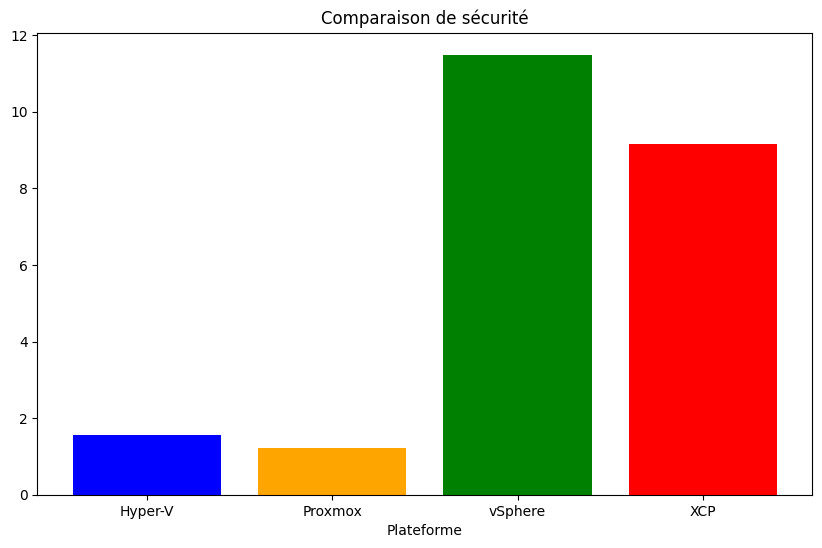

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hyperv_df = pd.read_csv('/content/security/HyperV_security.csv')
proxmox_df = pd.read_csv('/content/security/proxmox_security.csv')
vsphere_df = pd.read_csv('/content/security/vsphere_security.csv')
xcp_df = pd.read_csv('/content/security/xcp_security.csv')

metrics = {
    'Hyper-V': hyperv_df.loc[hyperv_df['Metric'] == 'Throughput', 'read MiB/s'].values[0],
    'Proxmox': proxmox_df.loc[proxmox_df['Metric'] == 'Throughput', 'read MiB/s'].values[0],
    'vSphere': vsphere_df.loc[vsphere_df['Metric'] == 'Throughput', 'read MiB/s'].values[0],
    'XCP': xcp_df.loc[xcp_df['Metric'] == 'Throughput', 'read MiB/s'].values[0]
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Plateforme')
plt.title('Comparaison de sécurité')
plt.show()

In [ ]:
!pip install colorama

In [ ]:
import csv
from tabulate import tabulate
from colorama import Fore, Style

with open('/content/price.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader if any(field.strip() for field in row)]

table = []
for i, row in enumerate(rows):
    if i == 0:
        table.append([Fore.GREEN + Style.BRIGHT + cell + Style.RESET_ALL for cell in row])
    else:
        table.append([Fore.CYAN + cell + Style.RESET_ALL for cell in row])

print(tabulate(table, tablefmt="fancy_grid"))


╒═════════════════════╤════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════╤═══════════════════════════════╕
│ Critère             │ Licence                                                                            │ Coût initial                    │ Coût de support               │
├─────────────────────┼────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────┼───────────────────────────────┤
│ Proxmox             │ GNU Affero GPL (Open Source)                                                       │ Gratuit (Open Source)           │ Optionnel à partir de $85/an  │
├─────────────────────┼────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────┼───────────────────────────────┤
│ XCP-ng              │ GNU GPL (Open Source)                                                              │ Gratuit (Open So

In [ ]:
import csv
from tabulate import tabulate
from colorama import Fore, Style

with open('/content/conviviality.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader if any(field.strip() for field in row)]

table = []
for i, row in enumerate(rows):
    if i == 0:
        table.append([Fore.GREEN + Style.BRIGHT + cell + Style.RESET_ALL for cell in row])
    else:
        table.append([Fore.CYAN + cell + Style.RESET_ALL for cell in row])

print(tabulate(table, tablefmt="fancy_grid"))


╒═════════╤═══════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Critere │ Interface utilisateur                                                                         │ Installation et configuration                                                                            │ Fonctionnalités avancées                                                                                                             │ Support et documentation                                                                                                 │
├─────────┼───────────────────────────────────────────